# Time Series Data and Pandas
> A time series is a series of data points indexed (or listed or graphed) in time order (wikipedia)

> A time series is a sequence of numerical data points in successive order. In investing, a time series tracks the movement of the chosen data points, such as a security’s price, over a specified period of time with data points recorded at regular intervals (Investopedia)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Create a DateTimeIndex with `date_range()`

In [2]:
pd.date_range('2019/1/1', periods=10, freq='D')

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10'],
              dtype='datetime64[ns]', freq='D')

In [3]:
pd.date_range('2019/1/1', periods=10, freq='W')

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10'],
              dtype='datetime64[ns]', freq='W-SUN')

In [4]:
pd.date_range('2019/1/1', periods=10, freq='M')

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31'],
              dtype='datetime64[ns]', freq='M')

In [5]:
pd.date_range('2019/1/1', periods=10, freq='Y')

DatetimeIndex(['2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31',
               '2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [6]:
df = pd.DataFrame()
df['Close'] = np.random.randint(low=120, high=200, size=10)
df['Volume'] = np.random.randint(low=10000, high=100000, size=10)

df.head()

,Close,Volume
0,168,95746
1,156,95544
2,158,98520
3,132,27377
4,168,63091


In [7]:
idx = pd.date_range('2019/1/1', periods=10, freq='D')
df.set_index(idx, inplace=True)
df.head()

,Close,Volume
2019-01-01,168,95746
2019-01-02,156,95544
2019-01-03,158,98520
2019-01-04,132,27377
2019-01-05,168,63091


# Working with Time Series Data

In [8]:
amazon = pd.read_csv("Data/amzn_stock.csv")

In [9]:
amazon.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,136.25,136.61,133.14,133.90,7600543
1,2010-01-05,133.43,135.48,131.81,134.69,8856456
2,2010-01-06,134.60,134.73,131.65,132.25,7180977
3,2010-01-07,132.01,132.32,128.80,130.00,11030124
4,2010-01-08,130.56,133.68,129.03,133.52,9833829


In [11]:
amazon.index

RangeIndex(start=0, stop=1896, step=1)

In [12]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 6 columns):
Date      1896 non-null object
Open      1896 non-null float64
High      1896 non-null float64
Low       1896 non-null float64
Close     1896 non-null float64
Volume    1896 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 89.0+ KB


In [13]:
amazon["Date"] = pd.to_datetime(amazon['Date'])
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 6 columns):
Date      1896 non-null datetime64[ns]
Open      1896 non-null float64
High      1896 non-null float64
Low       1896 non-null float64
Close     1896 non-null float64
Volume    1896 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 89.0 KB


### Create an Index from date

In [14]:
amazon.set_index("Date", inplace=True)
amazon.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [15]:
amazon.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [16]:
amazon.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-11,993.00,995.99,983.72,994.13,2982726
2017-07-12,1000.65,1008.55,998.10,1006.51,3608574
2017-07-13,1004.62,1006.88,995.90,1000.63,2880769
2017-07-14,1002.40,1004.45,996.89,1001.81,2102469
2017-07-17,1004.69,1014.75,1003.81,1010.04,3668721


In [17]:
amazon = amazon.truncate(before='2011/01/01')
amazon.head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-01-03,181.37,186.00,181.21,184.22,5333813
2011-01-04,186.15,187.70,183.78,185.01,5034775
2011-01-05,184.10,187.45,184.07,187.42,3418779
2011-01-06,186.50,187.41,185.25,185.86,3179610
2011-01-07,187.88,188.45,183.74,185.49,5222815


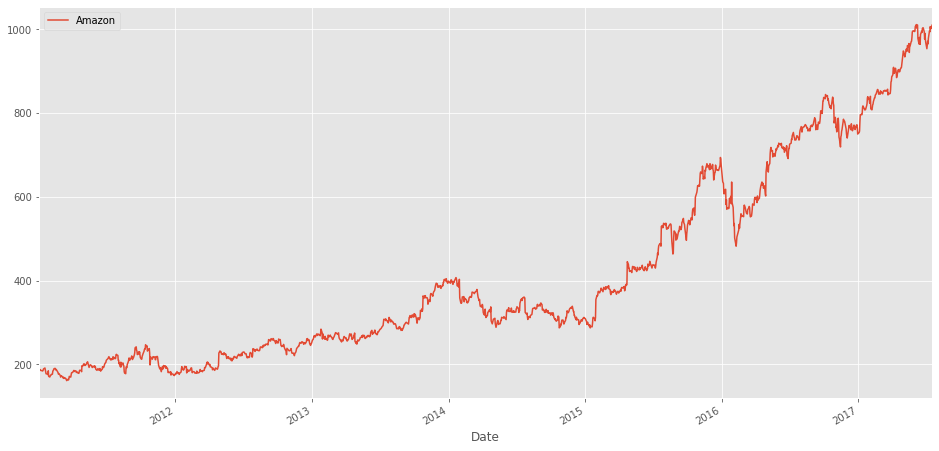

In [19]:
amazon["Close"].plot(label="Amazon",legend=True, figsize=(16,8))

In [20]:
amazon.head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2011-01-03,181.37,186.00,181.21,184.22,5333813
2011-01-04,186.15,187.70,183.78,185.01,5034775
2011-01-05,184.10,187.45,184.07,187.42,3418779
2011-01-06,186.50,187.41,185.25,185.86,3179610
2011-01-07,187.88,188.45,183.74,185.49,5222815
2011-01-10,185.04,185.29,182.51,184.68,3376678
2011-01-11,185.42,186.00,183.21,184.34,2815814
2011-01-12,185.36,185.38,183.30,184.08,2679087
2011-01-13,183.60,186.45,183.51,185.53,3368768


In [21]:
amazon.resample('M').sum().head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-01-31,3648.82,3685.05,3602.48,3647.05,113664552
2011-02-28,3430.06,3475.77,3399.58,3441.24,95851995
2011-03-31,3878.50,3928.68,3831.88,3882.49,119022379
2011-04-30,3678.27,3724.00,3636.11,3691.53,116805379
2011-05-31,4157.74,4208.72,4111.23,4161.50,106355804


In [22]:
amazon.resample('M').mean().head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-01-31,182.441000,184.252500,180.124000,182.352500,5.683228e+06
2011-02-28,180.529474,182.935263,178.925263,181.117895,5.044842e+06
2011-03-31,168.630435,170.812174,166.603478,168.803913,5.174886e+06
2011-04-30,183.913500,186.200000,181.805500,184.576500,5.840269e+06
2011-05-31,197.987619,200.415238,195.772857,198.166667,5.064562e+06


In [23]:
amazon.resample('M').first().head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-01-31,181.37,186.00,181.21,184.22,5333813
2011-02-28,170.52,173.10,169.51,172.11,5089748
2011-03-31,173.53,173.96,168.67,169.44,5847443
2011-04-30,181.58,183.25,178.59,180.13,5686427
2011-05-31,196.57,203.42,196.18,201.19,9399303


In [24]:
amazon.resample('M').last().head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-01-31,170.16,171.44,167.41,169.64,6721545
2011-02-28,173.91,175.89,172.15,173.29,6788009
2011-03-31,179.31,181.57,178.50,180.13,4828345
2011-04-30,194.38,196.59,193.78,195.81,6640873
2011-05-31,195.94,198.44,195.03,196.69,3412945


In [ ]:
amazon.head()

In [ ]:
amazon.shift(1).head()

In [ ]:
amazon.shift(-1).head()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(amazon["Close"].head(30).shift(1), label='Original')
plt.plot(amazon["Close"].head(30), label='Shifted')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(amazon["Close"].head(30).shift(-1), label='Original')
plt.plot(amazon["Close"].head(30), label='Shifted')
plt.legend()
plt.show()

### Percent Change

In [ ]:
(amazon.head()/amazon.shift(1).head() - 1)

In [ ]:
amazon.head().pct_change()